In [2]:
pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data                 0.2024.6.3.0.31.14
astto

In [28]:
sko.__version__

NameError: name 'sko' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
from scipy import spatial
import random

In [8]:
num_points = 12 # Number of towns to travel
points_coordinate = np.random.rand(num_points, 2)
points_coordinate

array([[0.23425146, 0.01211288],
       [0.0329945 , 0.82701166],
       [0.59349937, 0.12404579],
       [0.20783085, 0.06775563],
       [0.40308065, 0.7079227 ],
       [0.30410475, 0.66615641],
       [0.61626441, 0.91127337],
       [0.11130158, 0.34232259],
       [0.08060082, 0.36075972],
       [0.72648439, 0.48916267],
       [0.79107249, 0.67231512],
       [0.11695255, 0.46992219]])

In [9]:
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

In [10]:
distance_matrix

array([[0.        , 0.83938334, 0.37628187, 0.06159679, 0.71599903,
        0.6577632 , 0.976946  , 0.35235653, 0.38100281, 0.68547047,
        0.86366467, 0.4725975 ],
       [0.83938334, 0.        , 0.89906992, 0.7791261 , 0.38877492,
        0.31523829, 0.58932489, 0.49097403, 0.46867605, 0.77140791,
        0.77370102, 0.36682673],
       [0.37628187, 0.89906992, 0.        , 0.38975478, 0.61414293,
        0.61451865, 0.78755667, 0.52930093, 0.56488796, 0.3885812 ,
        0.5827816 , 0.58883559],
       [0.06159679, 0.7791261 , 0.38975478, 0.        , 0.66928049,
        0.60609583, 0.93719803, 0.29104109, 0.31943525, 0.66827044,
        0.84003749, 0.41230669],
       [0.71599903, 0.38877492, 0.61414293, 0.66928049, 0.        ,
        0.10742743, 0.29461638, 0.46775899, 0.47383054, 0.39044325,
        0.38962234, 0.37217407],
       [0.6577632 , 0.31523829, 0.61451865, 0.60609583, 0.10742743,
        0.        , 0.39689543, 0.3768838 , 0.3784457 , 0.45796435,
        0.48700669,

In [11]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [12]:
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

In [13]:
best_x, best_y = aca.run()

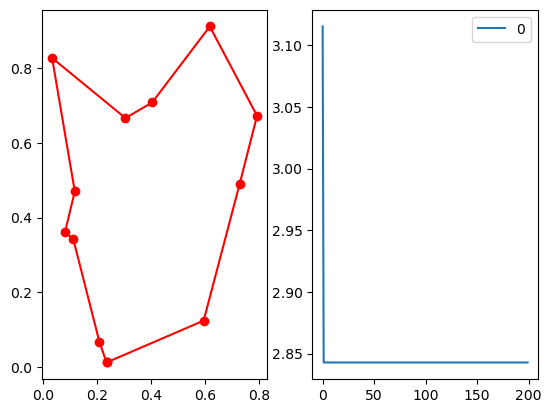

In [14]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()